In [1]:
# import required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# load the csv into a dataframe
lending_df = pd.read_csv('loan.csv')

In [3]:
# check the shape of the dataframe
lending_df.shape

(39717, 111)

In [4]:
# display information about the dataframe
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# let's see which columns have null values and how much
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12940),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('mths_since_last_major_derog', 39717),
 ('annual_inc_joint', 39717),
 ('dti_joint', 39717),
 ('verification_status_joint', 39717),
 ('tot_coll_amt', 39717),
 ('tot_cur_bal', 39717),
 ('open_acc_6m', 39717),
 ('open_il_6m', 39717),
 ('open_il_12m', 39717),
 ('open_il_24m', 39717),
 ('mths_since_rcnt_il', 39717),
 ('total_bal_il', 39717),
 ('il_util', 39717),
 ('open_rv_12m', 39717),
 ('open_rv_24m', 39717),
 ('max_bal_bc', 39717),
 ('all_util', 39717),
 ('total_rev_hi_lim', 39717),
 ('inq_fi', 39717),
 ('total_cu_tl', 39717),
 ('inq_last_12m', 39717),
 ('acc_open_past_24mths', 39717),
 ('avg_cur_bal', 39717),
 ('bc_open_to_buy', 39717),
 ('bc_util', 39717),
 ('chargeoff_within_12_mths', 56),
 ('mo_sin_ol

In [6]:
# remove all columns that doesn't have any data at all
lending_df = lending_df.dropna(axis=1, how='all')

In [7]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12940),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [8]:
# drop few other columns that have significant missing values or are irrelevant
columns_to_drop = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc']
lending_df.drop(columns = columns_to_drop, inplace=True)
lending_df.shape

(39717, 53)

In [9]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [10]:
# inspect employee title
# number of employers / employee title
print(len(lending_df['emp_title'].unique()))

# count of employee titles
print(lending_df['emp_title'].value_counts())

28821
US Army                                   134
Bank of America                           109
IBM                                        66
AT&T                                       59
Kaiser Permanente                          56
                                         ... 
Boundary Waters Bank                        1
MicroDAQ.com, Ltd                           1
Eagle Mt.-Saginaw ISD                       1
Berkshire Hathaway Homestate Companies      1
interscape construction                     1
Name: emp_title, Length: 28820, dtype: int64


In [11]:
# remove employee title column as it has lot of missing values and doesn't think it would impact the analysis as much considering there are
# 28K unique employee titles and the individual counts are not that high
lending_df.drop(columns=['emp_title'], inplace=True)

In [12]:
# we have emp_length with 1000 plus missing values. First clean employee length before taking a call on what to do
lending_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [13]:
# Just get the numericals from the emp_length data (less than 1 is considered one and above 10 is considered 10)
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: str(x).replace('years', '').replace('year', '').replace('<','').replace('+',''))

In [14]:
# analyse the values and it's distribution
lending_df['emp_length'][lending_df['emp_length'] != 'nan'].apply(lambda x: int(x)).value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [15]:
# Try to impute values for employee length based on the distribution so that it doesn't skew the analysis
# set 'nan' string to actual nulls
lending_df['emp_length'] = lending_df['emp_length'].replace('nan', np.nan)

# get distribution of non null values
dbn = lending_df['emp_length'].dropna().apply(lambda x: int(x)).value_counts(normalize=True)

#missing values
mval = lending_df['emp_length'].isnull()
num_mval = mval.sum()

# values to impute
impute_val = np.random.choice(dbn.index, num_mval, p=dbn.values)

# finally fill nan with
lending_df.loc[mval, 'emp_length'] = impute_val

In [16]:
# convert everything to integer
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: int(x))

In [17]:
# check again
lending_df['emp_length'].value_counts()

10    9115
1     8022
2     4513
3     4216
4     3530
5     3377
6     2298
7     1817
8     1528
9     1301
Name: emp_length, dtype: int64

In [18]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [19]:
# 'pub_rec_bankruptcies' is a significant field in the analysis as this shows how many times a person filed for bankruptcies, hence removing records without this value
lending_df = lending_df.dropna(subset=['pub_rec_bankruptcies'])

In [20]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 1),
 ('collections_12_mths_ex_med', 2),
 ('chargeoff_within_12_mths', 2)]

In [21]:
"""
 'revol_util or revolving line utilization rate'
 'collections in the last 12 months'
 'chargeoff within last 12 months
 
 are all important fileds removing records with nulls in them
"""
lending_df = lending_df.dropna(subset=['revol_util','chargeoff_within_12_mths','collections_12_mths_ex_med' ])

In [22]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11), ('last_pymnt_d', 67), ('last_credit_pull_d', 1)]

In [23]:
#Drop remaining null values
lending_df=lending_df.dropna(axis=0)

In [24]:
# remove '%' symbol from int_rate and converting to float
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x: str(x).replace('%', ''))
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x: float(x))

In [25]:
# extract first three numerical number from zip code
lending_df['zip_code'] = lending_df['zip_code'].apply(lambda x: x[:3])
lending_df['zip_code'] = lending_df['zip_code'].apply(lambda x: int(x))

In [26]:
#add a new column earliest_cr_year by extracting year part from earliest_cr_line
lending_df['earliest_cr_year']=lending_df['earliest_cr_line'].apply(lambda x : '20'+x[-2:] if int(x[-2:]) <10 else '19'+x[-2:])
lending_df['earliest_cr_year'] = lending_df['earliest_cr_year'].apply(lambda x: int(x))

In [27]:
#remove '%' symbol from revol_util and converting to float
lending_df['revol_util'] = lending_df['revol_util'].apply(lambda x: str(x).replace('%', ''))
lending_df['revol_util'] = lending_df['revol_util'].apply(lambda x: float(x))

In [28]:
# Remove outliers from annual_inc columns
lending_df=lending_df[lending_df['annual_inc'] <= 1000000]

In [27]:
# will keep the rest of the data as is

In [29]:
# univariate analysis
lending_df['loan_amnt'].value_counts()

10000    2754
12000    2297
5000     1996
6000     1877
15000    1857
         ... 
1425        1
29375       1
22650       1
26300       1
24700       1
Name: loan_amnt, Length: 875, dtype: int64

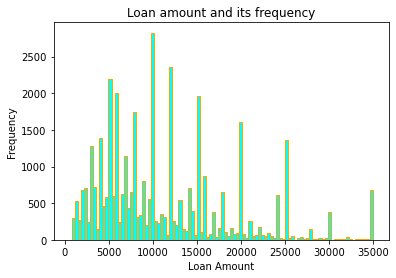

In [30]:
# looking at loan amount
plt.hist(lending_df['loan_amnt'], bins=100, edgecolor='Orange',color='cyan')
plt.title('Loan amount and its frequency')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### Insights

1) Most commonly people apply for 10000 USD  
2) The amounts in between (that is not an increment of 5k) seem to be very less frequent and becomes rare as the amount increases (see there are close to 400 applications for a loan amount of 30,000 whereas virtually nothing till 35000 which has more than 500 applicants)

This should be because they round up the required amount and then apply for loan and 10,000 seem to be the amount that most of the requirements fall in.

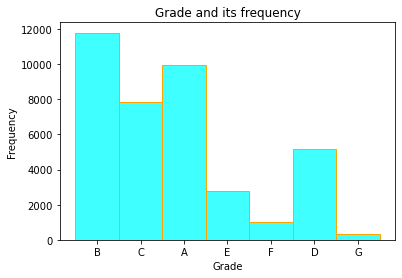

In [31]:
# looking at Grade
sns.histplot(lending_df['grade'], bins = 20, edgecolor='Orange',color='cyan')
plt.title('Grade and its frequency')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

### Insights
Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

1) There are 7 grades for loans
2) Grade and A, B and C are more common with being the most common.  
3) Very few loans are in D,E,F and G grades and declining numbers from D to G with G being the lowest

The reason for the Grades A,B and C to be more common coul be because the lending agency doesn't want to take risk. Interestingly most loans are graded B and not A.

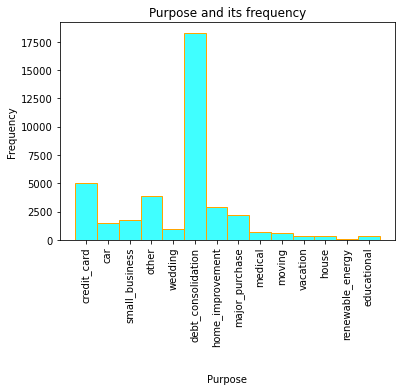

In [32]:
# purpose
sns.histplot(lending_df['purpose'], bins = 20, edgecolor='Orange',color='cyan')
plt.title('Purpose and its frequency')
plt.xlabel('\n\nPurpose')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

### Insights

1) Most loans are applied for debt_consolidation, more than 45 percent of total loans. Debt consolidation means that a person tries to consolidate all his debts into a single debt.  
2) The second most common reason for loan application is to pay off credit card bills.  
3) Very few people take loans for house, car or educational purposes which is an interesting insight since this is what we think of common rasons for applying loan.

Debt consolidation is the primary reason for people to apply for loan which is interesting since milestone vents like house
car etc are way below as a reason to take loan.

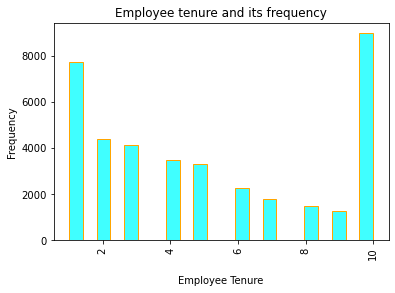

In [33]:
# employee tenure
sns.histplot(lending_df['emp_length'], edgecolor='Orange',color='cyan')
plt.title('Employee tenure and its frequency')
plt.xlabel('\nEmployee Tenure')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

### Insights
1) Employees with 10 plus years of tenure or within their 1st year tend to apply for loans the most  
2) Employees with tenure between 2 and 9 years have a declining trend in application of loan from 2 to 9   
  
The increase in loan application at 1st year or 10 plus years may indicate milestone life events for which the loan was applied.

In [33]:
# starting multivariate analysis focusing on how specific data points impact loan default

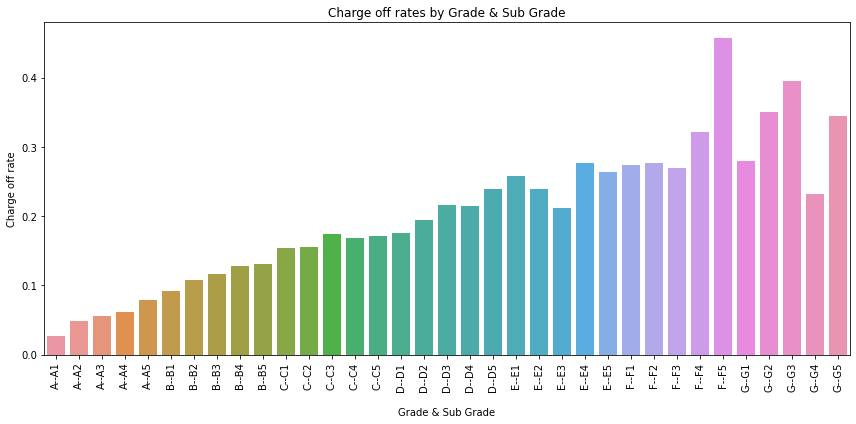

In [34]:
# based on grade and subgrade
grade_df = lending_df[['grade', 'sub_grade', 'loan_status']]

# get charge_off rates
charge_off_rt = grade_df.groupby(['grade', 'sub_grade']).apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nGrade & Sub Grade')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Grade & Sub Grade')
plt.xticks(charge_off_rt.index, charge_off_rt['grade'] + '--' + charge_off_rt['sub_grade'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Grade and Sub Grade
1) Loans are graded from A to G based on risk analysis, A being the lowest risk and G being the highest  
2) Within the grades there are sub grades again from 1 to 5. For example A1 - A5 where A1 is with lowest risk whereas A5 has the highest  
3) As expected from the data we have, Loans graded A and subgrade A1 has the lowest default / charge off rates  
4) The tendency in general is that the lower the grade-subgrade combination the higher the default rate. For example A-A1 (higher grade) has lower default rate than B-B1(lower grade)  
5) However the highest default rate is among F-F5 close to 45 percent default rate which is very high.  
  
  
The trend is more or less as expected with lower the grade, sub grade combination, higher the default rate. However interestingly Grade F with sub grade F5 seem to have 45 percent default rate and should be looked at from a higher risk perspective

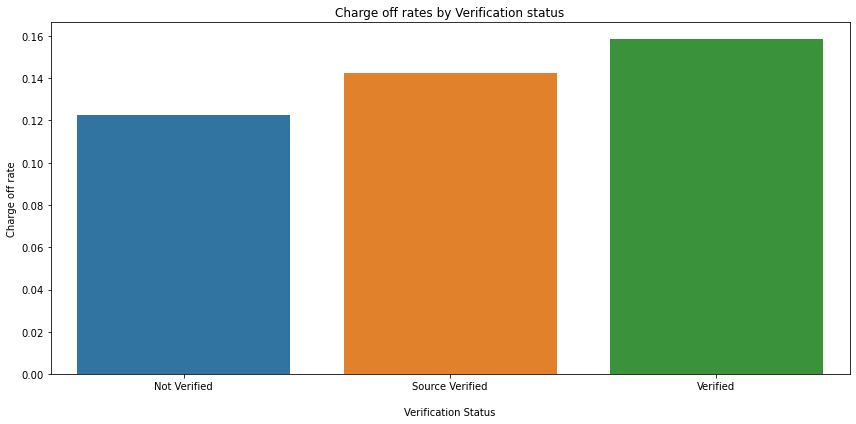

In [35]:
# impact of verification status
verification_df = lending_df[['verification_status', 'loan_status']]

# get default rate based on verification status
charge_off_rt = verification_df.groupby('verification_status').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nVerification Status')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Verification status')
plt.xticks(charge_off_rt.index, charge_off_rt['verification_status'])
plt.tight_layout()
plt.show()

### Insights - Loan default rates by verification status
1) Verification status tells us if the income of the borrower is verified either by lending club or if the income source was verified or not verified at all.  

2) There is however not a significant impact on the default rate as evident from the visualization. The overall data in the dataset also has loan default rate of 14 percent which is about similar for all 3 verification status indicating that more or less there is no impact on default rate from the verification status.
  
Interestingly, even if there is no major impact on income verification, the trend is opposite of what is expected. When the income source is verified the default rate seem to have gone up. Somthing to be looked at.

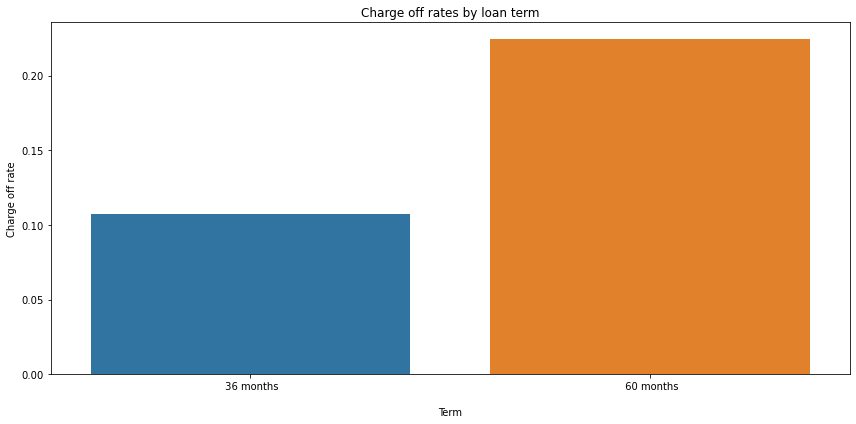

In [36]:
# impact of loan term
term_df = lending_df[['term', 'loan_status']]

# get default rate based on loan term
charge_off_rt = term_df.groupby('term').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nTerm')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by loan term')
plt.xticks(charge_off_rt.index, charge_off_rt['term'])
plt.tight_layout()
plt.show()


### Insights - Loan default rates by loan term
1) There are only two loan terms in the dataset, 36 months and 60 months.  
2) Loans with a 60 month term has double default rate than that of a 36 month loan term.  
  
This could be due to the amount borrowed being high for the longer tenure. The impact of combination of term and amount can be checked further.

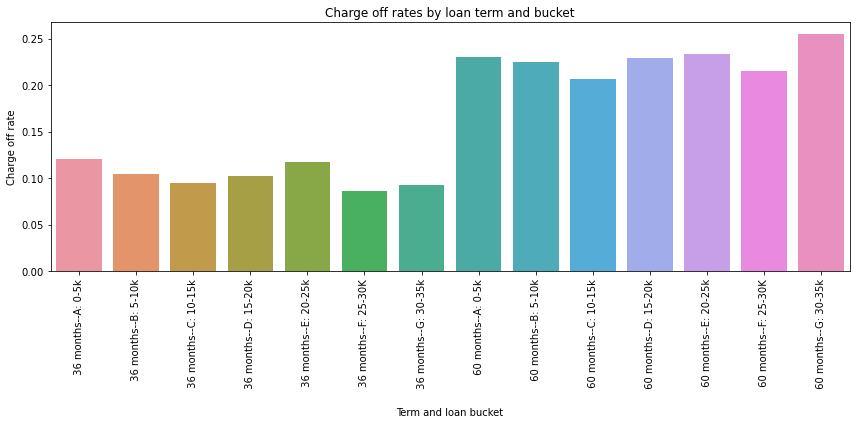

In [37]:
# impact of loan term
term_df = lending_df[['term', 'loan_status']]

# create a derived field with laon_amnt buckets
term_df['loan_bckt'] = lending_df['loan_amnt'].apply(lambda x: 'A: 0-5k' if x <= 5000 else
                                                 'B: 5-10k' if x > 5000 and x <= 10000 else
                                                 'C: 10-15k' if x > 10000 and x <= 15000 else 
                                                 'D: 15-20k' if x > 15000 and x <= 20000 else
                                                 'E: 20-25k' if x > 20000 and x <= 25000 else
                                                 'F: 25-30K' if x > 25000 and x <= 30000 else
                                                 'G: 30-35k')

# get default rate based on loan term and lon amount
charge_off_rt = term_df.groupby(['term', 'loan_bckt']).apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nTerm and loan bucket')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by loan term and bucket')
plt.xticks(charge_off_rt.index, charge_off_rt['term'] + '--' + charge_off_rt['loan_bckt'] , rotation=90)
plt.tight_layout()
plt.show()


### Insights - Loan default rates by loan term and amount
1) There are only two loan terms in the dataset, 36 months and 60 months.    
2) if we split the loan amounts into 7 buckets of intervals 5k each and use that along with the loan term to see the impact on the loan repayment, it gives better insights.  
3) In general if the loan-term is higher the default rates are also higher. 
3) Interestingly the amount of loan taken doesn't seem to have a huge impact on loan repayment as much as the loan term. For example a loan amount of 30K and above has much higher default rate for loan term 60 months than loan term 36 months.  
4) A lower loan term might indicate the confidence of the borrower in repaying the loan and hence the lower default rate.  
5) The dafult rate doesn't vary significantly based on amount within a specific loan term.  
6) Interestingly a higher amount of 30k plus with a loan term of 36 months has lower default rate than a 5k loan amount with 36 months term. However a higher loan amount within a 60 month term has higher default rate than other buckets in the 60 months term.  
  
  
The interesting conclusion is that higher the loan term, higher the risk irrespective of the loan amount

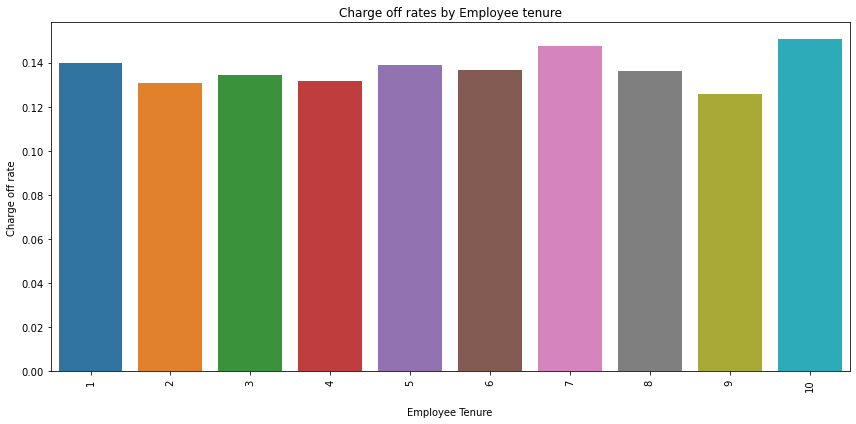

In [38]:
# impact of employee length', 'loan_status'
emp_len_df = lending_df[['emp_length', 'loan_status']]

# get default rate based on employee length
charge_off_rt = emp_len_df.groupby('emp_length').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nEmployee Tenure')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Employee tenure')
plt.xticks(charge_off_rt.index, charge_off_rt['emp_length'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Employee tenure
1) There is no significant impact of Employee tenure (how long the borrower has been working) on loan default rates.  
2) The default rate of all tenures hover around 14 percent which is the overall loan dfeault rate of the dataset concluding no impact.

There doesn't seem to be any impact of the employee tenure on loan repayment

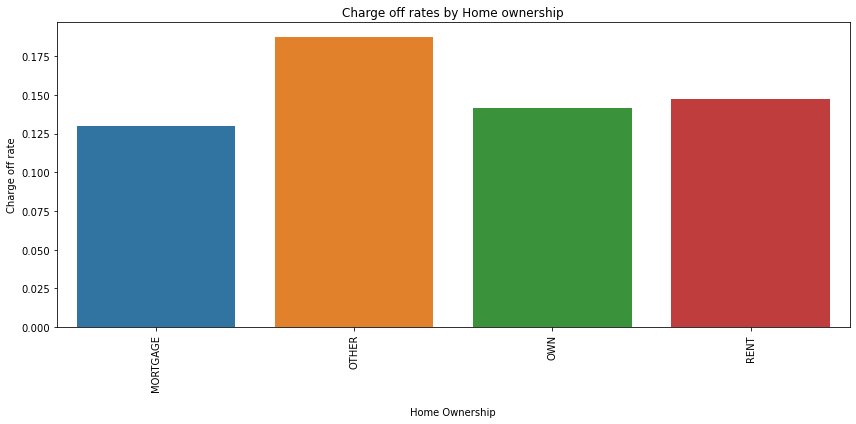

In [39]:
# impact of employee home ownership
ho_df = lending_df[['home_ownership', 'loan_status']]

# get default rate based on home ownership
charge_off_rt = ho_df.groupby('home_ownership').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nHome Ownership')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Home ownership')
plt.xticks(charge_off_rt.index, charge_off_rt['home_ownership'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Home ownership
1) There is no significant impact of Home ownership on loan default rates.   
2) The default rates among home owners, home on mortgage or rented borrower hover around the same rates.  
3) Borrowers with undisclosed / unknown home ownership status has much higher default rate. about 18 percent.  
  
  
Borrowers with undisclosed home ownership status tend to default payment higher than a known home ownership status. So Lending club should keep an eye on why home ownership is not disclosed and treat such cases as higher risk

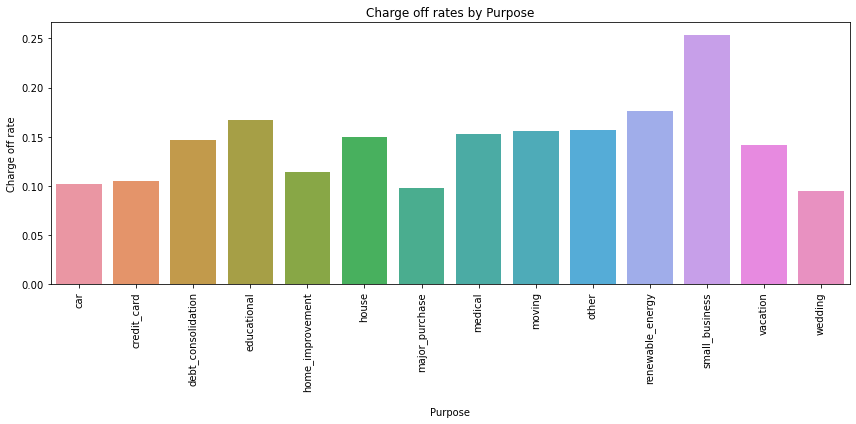

In [40]:
# impact of purpose of loan on repayment
prp_df = lending_df[['purpose', 'loan_status']]

# get default rate based on purpose
charge_off_rt = prp_df.groupby('purpose').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nPurpose')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Purpose')
plt.xticks(charge_off_rt.index, charge_off_rt['purpose'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Loan purpose

1) Highest default rates of about 25% is for loans aquired for small_businesses.
2) Mostly everything else stays within 15% or lower.
3) Loans availed for educational purpose and renewable energy also go slightly above 15%
  
  
  
The small business loans are the riskiest by far with over 25% default rate


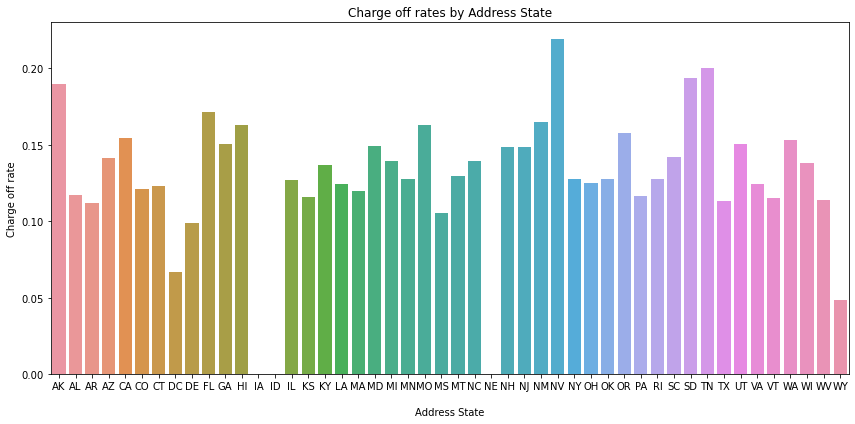

In [48]:
# impact of employee address state
state_df = lending_df[['addr_state', 'loan_status']]

# get default rate based on address state
charge_off_rt = state_df.groupby('addr_state').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nAddress State')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Address State')
plt.xticks(charge_off_rt.index, charge_off_rt['addr_state'])
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Adress

1) The default rate spread across address state is uneven.  
2) The states IA, ID and NE has extremely few numbers and hence teh 0 percent default need not be taken at face value.  
  
  
Loans from states 'NV' (Nevada) has the highest default rate crossing more than 20 percent. Loans given to these states can be consodered risky. The risk is reasonably high for lons given to people from state Tenesse(TN), South Dakota(SD) and Alaska(AK).

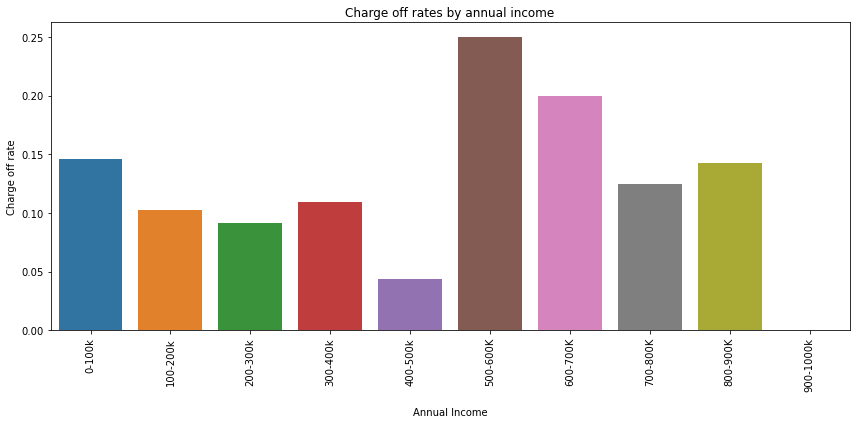

In [54]:
# impact of annual income
inc_df = lending_df[['annual_inc', 'loan_status']]

# create a derived field inc_bckt from annual_inc 
inc_df['inc_bckt'] = lending_df['annual_inc'].apply(lambda x: '0-100k' if x <= 100000 else
                                                 '100-200k' if x > 100000 and x <= 200000 else
                                                 '200-300k' if x > 200000 and x <= 300000 else 
                                                 '300-400k' if x > 300000 and x <= 400000 else
                                                 '400-500k' if x > 400000 and x <= 500000 else
                                                 '500-600K' if x > 500000 and x <= 600000 else
                                                 '600-700K' if x > 600000 and x <= 700000 else
                                                  '700-800K' if x > 700000 and x <= 800000 else
                                                   '800-900K' if x > 800000 and x <= 900000 else
                                                   '900-1000k')

# get default rate based on income
charge_off_rt = inc_df.groupby('inc_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nAnnual Income')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by annual income')
plt.xticks(charge_off_rt.index, charge_off_rt['inc_bckt'] , rotation=90)
plt.tight_layout()
plt.show()


### Insights - Loan default rates by income
1) No defaults for income group 900-1000k need to be taken at face vallue as there is only one loan given to person with that income level.  
2) Highest default rate is for people with income levels between 500-600k at close to 25%.  
3) Lowest default rate is for people with income levels between 400-500k.
  
  
Interesting insight is that income levels of 500-600k tend to default at a higher rate than any other income level and at a higher 25%. 

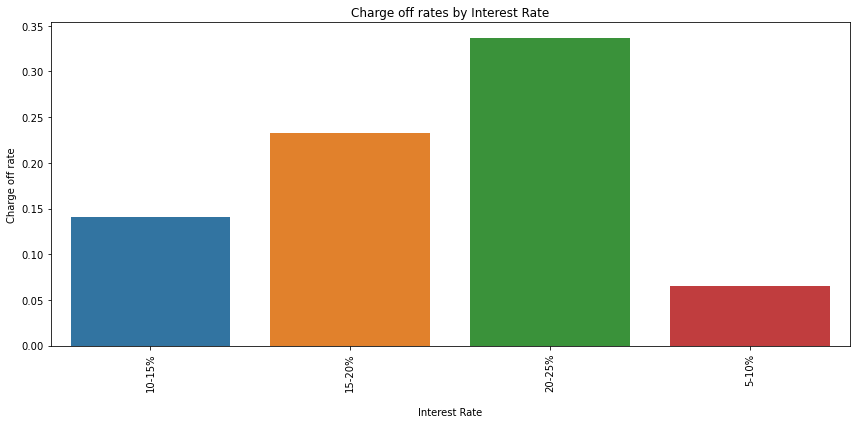

In [62]:
# impact of interest rate
int_df = lending_df[['int_rate', 'loan_status']]

# create a derived field int_bckt from int_rate 
int_df['int_bckt'] = lending_df['int_rate'].apply(lambda x: '5-10%' if x <= 10 else
                                                 '10-15%' if x > 10 and x <= 15 else
                                                 '15-20%' if x > 15 and x <= 20 else 
                                                  '20-25%')
# get default rate based on interest rate
charge_off_rt = int_df.groupby('int_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nInterest Rate')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Interest Rate')
plt.xticks(charge_off_rt.index, charge_off_rt['int_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by interest rates
Straight forward insight. Higher the interest rate, higher the loan default rate. A higher interest rate of 20-25% has very high risk. The loans given at this rate has more than 30% default rate. So is the loans given at 15 to 20 percent interest rate which has more than 20% default rate.

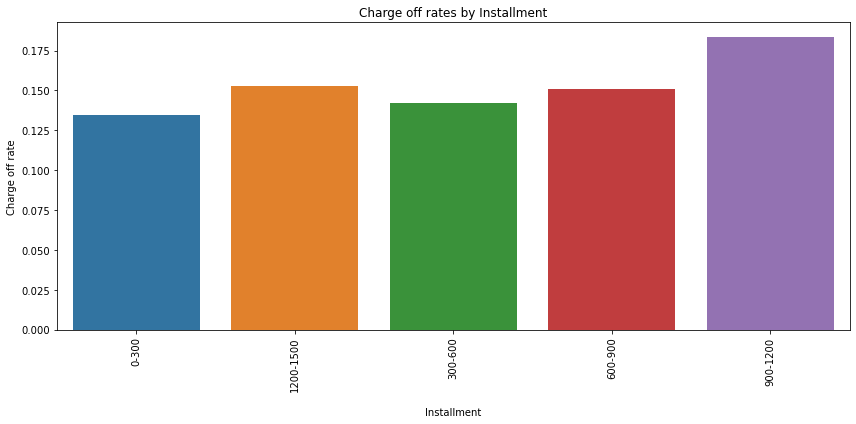

In [64]:
# impact of installment
install_df = lending_df[['installment', 'loan_status']]

# create a derived field install_bckt from installment 
install_df['install_bckt'] = lending_df['installment'].apply(lambda x: '0-300' if x <= 300 else
                                                 '300-600' if x > 300 and x <= 600 else
                                                 '600-900' if x > 600 and x <= 900 else
                                                 '900-1200' if x > 900 and x <= 1200 else
                                                  '1200-1500')
# get default rate based on installment
charge_off_rt = install_df.groupby('install_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nInstallment')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Installment')
plt.xticks(charge_off_rt.index, charge_off_rt['install_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by interest rates
Monthly installment amount doesn't seem to have a significant impact on loan repayment. The default rate remains more or less the same for installment amount. The highest deviation if for installments between 900 to 1200, which is close to 17%.

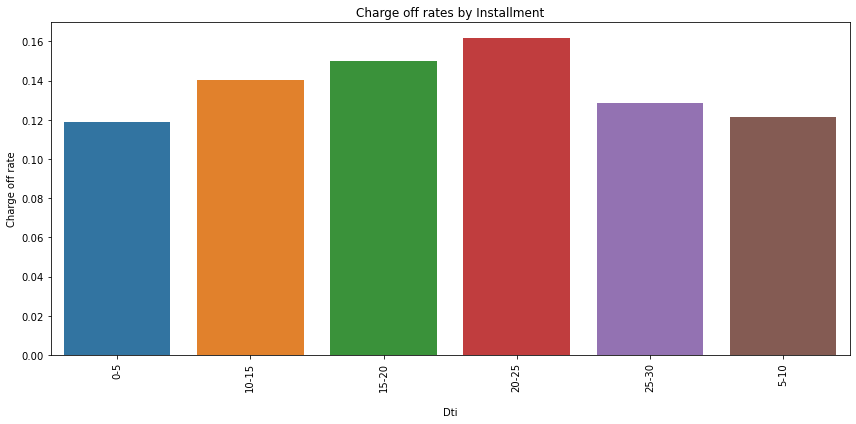

In [65]:
# impact of dti
dti_df = lending_df[['dti', 'loan_status']]

# create a derived field dti_bckt from dti
dti_df['dti_bckt'] = lending_df['dti'].apply(lambda x: '0-5' if x <= 5 else
                                                 '5-10' if x > 5 and x <= 10 else
                                                 '10-15' if x > 10 and x <= 15 else
                                                 '15-20' if x > 15 and x <= 20 else
                                                  '20-25' if x > 20 and x <= 25 else
                                                  '25-30')
# get default rate based on dti
charge_off_rt = dti_df.groupby('dti_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nDti')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Installment')
plt.xticks(charge_off_rt.index, charge_off_rt['dti_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by dti
DTI doesn't seem to have a huge impact on the loan repayment the default rates between various dti ratios seem to be between 12%-15% which is not a significant impact

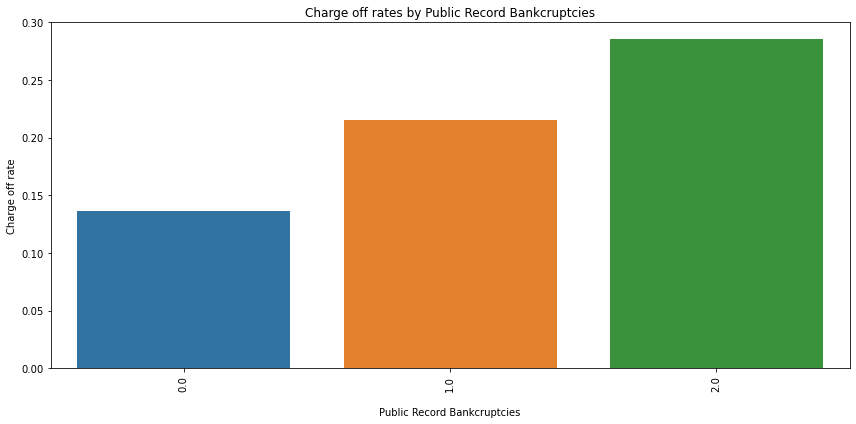

In [71]:
# impact of public record bankcruptcies
prb_df = lending_df[['pub_rec_bankruptcies', 'loan_status']]


# get default rate based on public record bankcruptcies
charge_off_rt = prb_df.groupby('pub_rec_bankruptcies').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nPublic Record Bankcruptcies')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Public Record Bankcruptcies')
plt.xticks(charge_off_rt.index, charge_off_rt['pub_rec_bankruptcies'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by bankruptcies
Bankruptcy records have a significant impact on loan repayment. A person who has filed 1 bankruptcy has defauted more than 20% percent and a borrower with 2 banruptcy record has defaulted close 30%. Higher bankruptcy record, higher the risk.

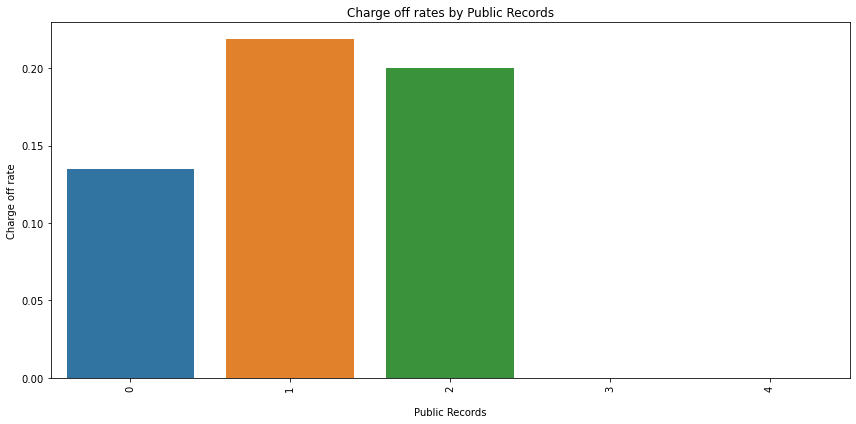

In [72]:
# impact of public records
pr_df = lending_df[['pub_rec', 'loan_status']]


# get default rate based on public records
charge_off_rt = pr_df.groupby('pub_rec').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nPublic Records')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Public Records')
plt.xticks(charge_off_rt.index, charge_off_rt['pub_rec'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by public derogatory records
Public derogatpry records does seem to have an ompact on loan repayment, but there is no real trend as such. A single derogatory record does have a risk with more than 20% default rate and 2 records show close to 20% default rate.
  
  
Lending to applicants with 1 public derogatory record against them is a relatievly higher risk.

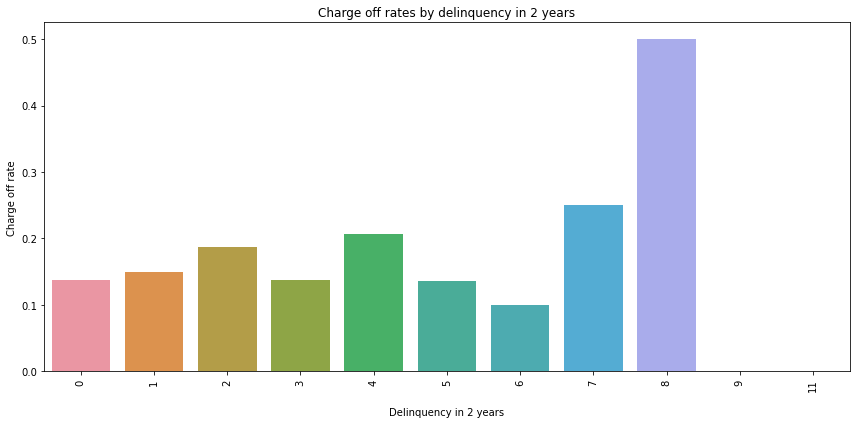

In [73]:
# impact of delinquency in 2 years
d2yr_df = lending_df[['delinq_2yrs', 'loan_status']]


# get default rate based on delinquency in 2 years
charge_off_rt = d2yr_df.groupby('delinq_2yrs').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nDelinquency in 2 years')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by delinquency in 2 years')
plt.xticks(charge_off_rt.index, charge_off_rt['delinq_2yrs'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by deliquency record in the last 2 years

There is no significant pattern. There is barely any applicant with more than 5 delinquency records and hence the default rates cannot be taken at face value.

In general applicants with 2 and 4 (considering upto 5 deliquency records as there is not enough data post that) have higher risk of about 20% default rate among them

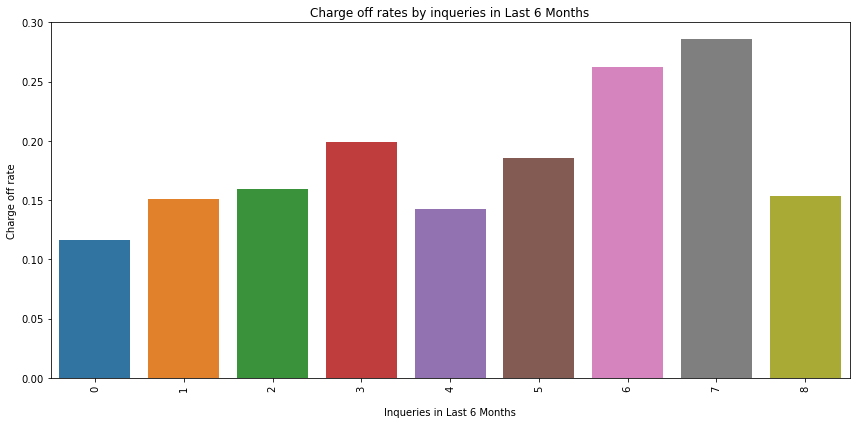

In [82]:
# impact of inquery in last 6 months
inq_df = lending_df[['inq_last_6mths', 'loan_status']]


# get default rate based on inquery in last 6 months
charge_off_rt = inq_df.groupby('inq_last_6mths').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nInqueries in Last 6 Months')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by inqueries in Last 6 Months')
plt.xticks(charge_off_rt.index, charge_off_rt['inq_last_6mths'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by credit inquiries

There is no significant pattern. However applicants with 6 and 7 inquiries in that past 6 months pose a higher risk of default over 25%

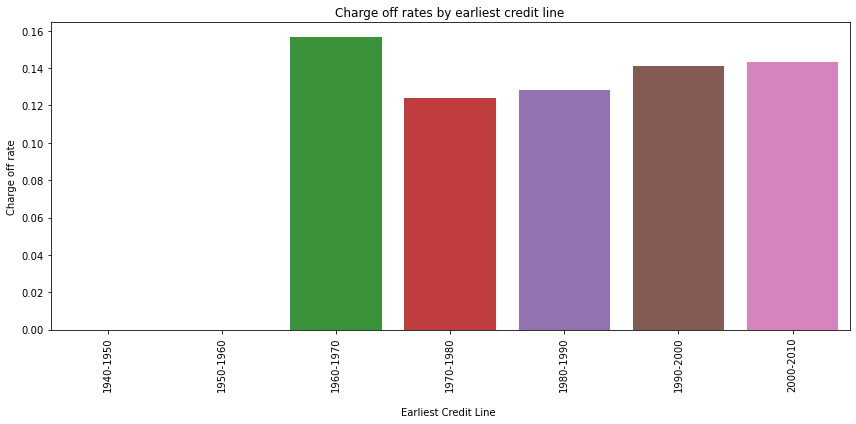

In [84]:
# impact of earliest credit line
ecl_df = lending_df[['earliest_cr_year', 'loan_status']]

# create a derived field ecl_bckt from earliest credit line
ecl_df['ecl_bckt'] = lending_df['earliest_cr_year'].apply(lambda x: '1940-1950' if x <= 1950 else
                                                 '1950-1960' if x > 1950 and x <= 1960 else
                                                 '1960-1970' if x >1960 and x <= 1970 else
                                                 '1970-1980' if x > 1970 and x <= 1980 else
                                                  '1980-1990' if x > 1980 and x <= 1990 else
                                                   '1990-2000' if x > 1990 and x <= 2000 else       
                                                  '2000-2010')
# get default rate based on earliest credit line
charge_off_rt = ecl_df.groupby('ecl_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nEarliest Credit Line ')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by earliest credit line')
plt.xticks(charge_off_rt.index, charge_off_rt['ecl_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by earliset credit year

There is no significant pattern. They all stay within the overall average of about 14% indicating no significant impact

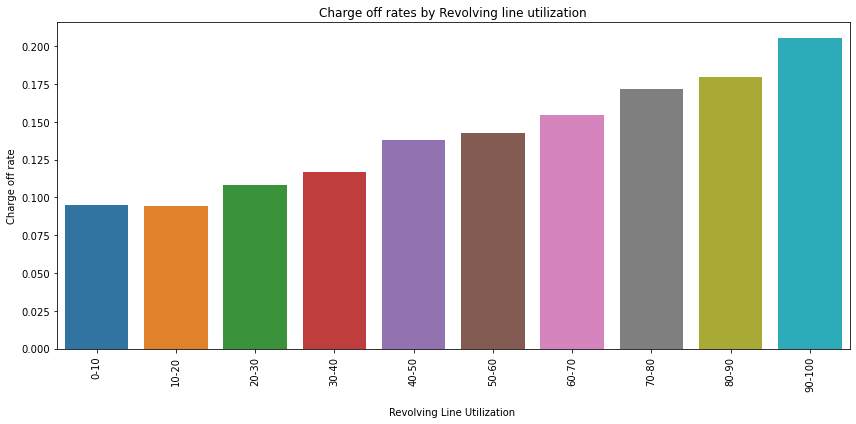

In [85]:
# impact of Revolving line utilization
revolu_df = lending_df[['revol_util', 'loan_status']]

# create a derived field revolu_bckt from evolving line utilization rate
revolu_df['revolu_bckt'] = lending_df['revol_util'].apply(lambda x: '0-10' if x <= 10 else
                                                 '10-20' if x > 10 and x <= 20 else
                                                 '20-30' if x >20 and x <= 30 else
                                                 '30-40' if x > 30 and x <= 40 else
                                                  '40-50' if x > 40 and x <= 50 else
                                                   '50-60' if x > 50 and x <= 60 else    
                                                    '60-70' if x > 60 and x <= 70 else
                                                  '70-80' if x > 70 and x <= 80 else
                                                   '80-90' if x > 80 and x <= 90 else         
                                                  '90-100')
# get default rate based on Revolving line utilization rate
charge_off_rt = revolu_df.groupby('revolu_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nRevolving Line Utilization ')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by Revolving line utilization')
plt.xticks(charge_off_rt.index, charge_off_rt['revolu_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by revolving credit utilization

There is a definite pattern here. The more the revolving credit utilization of the applicant the higher the risk of default. The highest default rate being close to 20% for a revilving credit utilization of 90 to 100 percent.

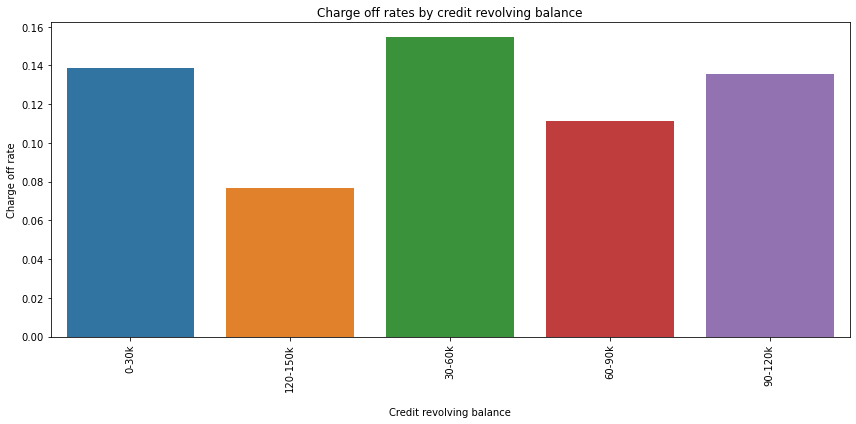

In [86]:
# impact of credit revolving balance
revolb_df = lending_df[['revol_bal', 'loan_status']]

# create a derived field revolb_bckt from revol_bal 
revolb_df['revolb_bckt'] = lending_df['revol_bal'].apply(lambda x: '0-30k' if x <= 30000 else                                                
                                                 '30-60k' if x > 30000 and x <= 60000 else
                                                  '60-90k' if x > 60000 and x <= 90000 else
                                                   '90-120k' if x > 90000 and x <= 120000 else
                                                   '120-150k')

# get default rate based on loan term and lon amount
charge_off_rt = revolb_df.groupby('revolb_bckt').apply(lambda x:(x['loan_status'] == 'Charged Off').mean()).reset_index(name='charge off rate')

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=charge_off_rt.index, y=charge_off_rt['charge off rate'])
plt.xlabel('\nCredit revolving balance')
plt.ylabel('Charge off rate')
plt.title('Charge off rates by credit revolving balance')
plt.xticks(charge_off_rt.index, charge_off_rt['revolb_bckt'] , rotation=90)
plt.tight_layout()
plt.show()


### Insights - Loan default rates by revolving credit balance

There is no high risk here. However an applicant with a revolving balance of 120-150k see to be very low risk with a default rate of less than 8%

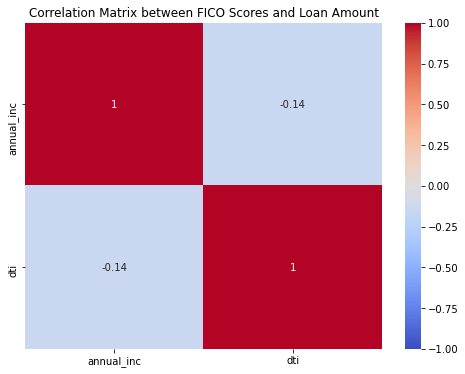

In [89]:
# correlation between annual income and dti
ai_dti_df = lending_df[['annual_inc', 'dti']]

# create correlation matrix 
corr_matrix = ai_dti_df.corr()

# visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between FICO Scores and Loan Amount')
plt.show()

### Insights - correlation between annual income and debt to income ratio

There doesn't seem to be any correlation between the two. The negative correlation of 14% is not very significant or strong

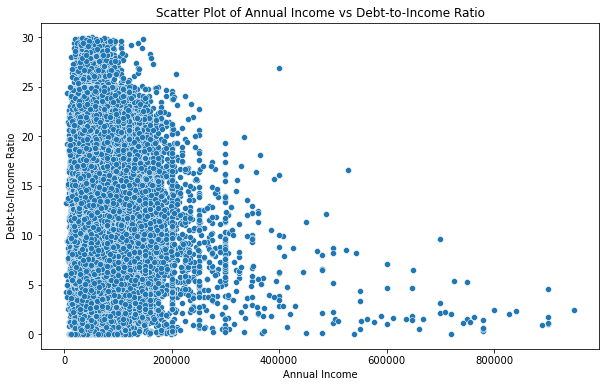

In [90]:
# scatter plot betweenincome to debt ratio and annual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', data=ai_dti_df)
plt.title('Scatter Plot of Annual Income vs Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Insights - correlation between annual income and debt to income ratio

In the scatter plot between annual income and dti, we can see a pattern. Only for very high income of 4ook or more the dti is very low. 

This in a way explains why 400-500k income range has a very low charge off / default rate which we saw in the previous analysis.

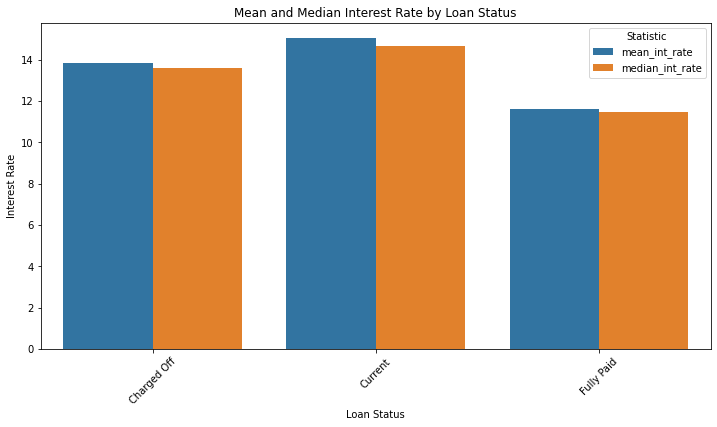

In [94]:
# compare loan status with other numerical features
loan_with_num_ft = lending_df[['loan_status', 'int_rate', 'installment', 'dti']]

# Create a pivot table
pivot_table = loan_with_num_ft.pivot_table(
    values='int_rate',
    index='loan_status',
    aggfunc=['mean', 'median']
).reset_index()

# Visualizing the pivot table
pivot_table.columns = ['loan_status', 'mean_int_rate', 'median_int_rate']
pivot_table_melted = pivot_table.melt(id_vars=['loan_status'], value_vars=['mean_int_rate', 'median_int_rate'])

plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_melted, x='loan_status', y='value', hue='variable')
plt.title('Mean and Median Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

### Insights - relationship between interest rate and loan status
The interesting insight here is that among fully paid loans the interest rate is the lowest at less than 12% (both mean and median).

There is about a 2% increse in the interest rate on charged off loan's.

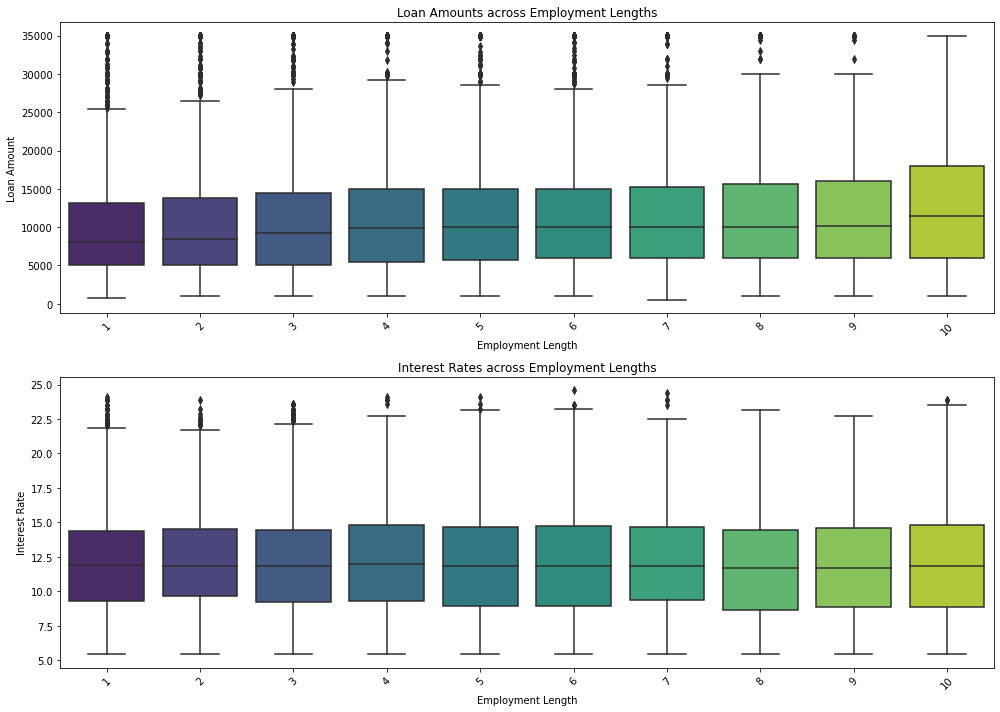

In [95]:
# Bivariate Analysis: Box plots
plt.figure(figsize=(14, 10))

# Box plot for Loan Amounts across Employment Lengths
plt.subplot(2, 1, 1)
sns.boxplot(data=lending_df, x='emp_length', y='loan_amnt', palette='viridis')
plt.title('Loan Amounts across Employment Lengths')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

# Box plot for Interest Rates across Employment Lengths
plt.subplot(2, 1, 2)
sns.boxplot(data=lending_df, x='emp_length', y='int_rate', palette='viridis')
plt.title('Interest Rates across Employment Lengths')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights - relationship of employee length with interest rates and loan amounts
1) Employee tenure has very weak pattern of applying for higher amounts (median value considered) with higher tenure / experience. However there is a clear higher spike on the 75th percentile values. The insight is that with more experience and higher salaries, there would be higher loan eligibility.  
  
  
2) Employee tenure doesn't seem to have a significant impact on the interest rates. The median interest rate and the 75th percentile values remain more or less similar across employee tenure. However the 25th percentile has a trend of getting lower as the tenure increase. This could be attributed to the higher salaries, meaning higher repayment capacities which keeps the risks low for the lending club and hence sanctions the loan at a lower interest rate

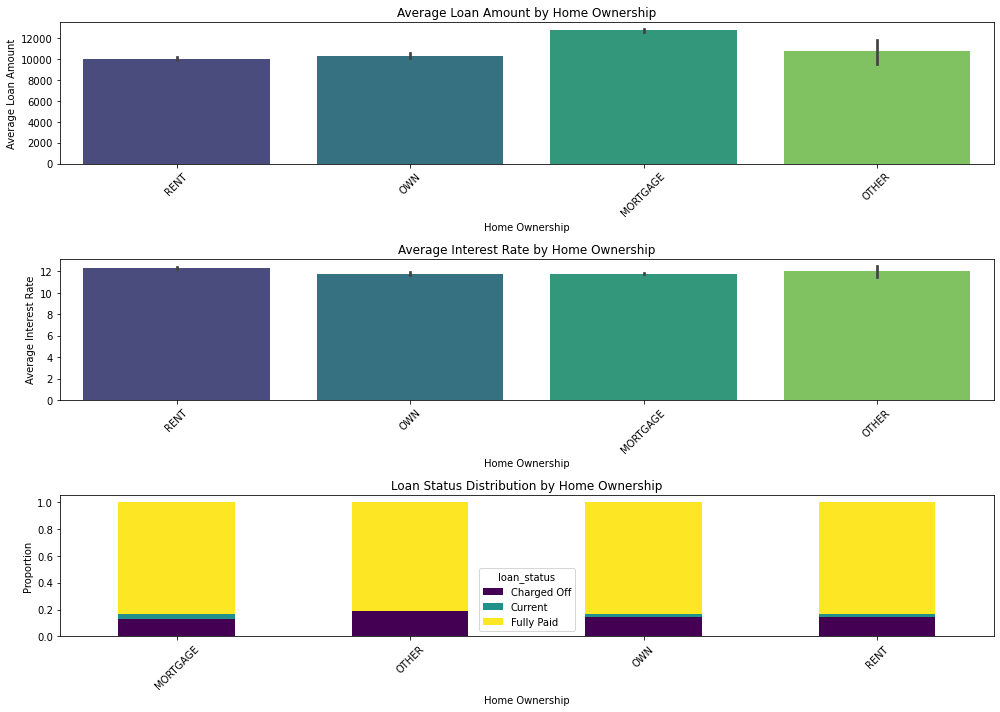

In [97]:
#Impact of home ownership on loan_amnt, int_rate, and loan_status
home_df = lending_df[['home_ownership', 'loan_amnt', 'int_rate', 'loan_status']]

# Visualizing Group Analysis
plt.figure(figsize=(14, 10))

# Loan Amount Analysis
plt.subplot(3, 1, 1)
sns.barplot(data=home_df, x='home_ownership', y='loan_amnt', palette='viridis')
plt.title('Average Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)

# Interest Rate Analysis
plt.subplot(3, 1, 2)
sns.barplot(data=home_df, x='home_ownership', y='int_rate', palette='viridis')
plt.title('Average Interest Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)

# Loan Status Analysis
plt.subplot(3, 1, 3)
loan_status_counts = home_df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
loan_status_counts.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights - impact of home ownership on  avergae loan amount, average interest rate and loan status
1) Home ownership doesn't have a huge impact on the loan amount sanctioned. Just the home owners with mortgage on their loan has applied for a higher loan amount, indicating the need for more money.
  
  
2) Avergae inerest rate doesn't change based on home ownership.
  
  
3) Home wonership doesn't seem to impact the default rates from the visualisation.